In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import fppnpx as fn
from fppnpx.FPPGLM import FPPGLM
from fppnpx.signalfuncs import load_signal, gen_all_channel_signals
from wavemapnpx.WaveMAPClassifier import WaveMAPClassifier

In [ ]:
CUSTOM_PAL_SORT_3 = ['#5e60ce', '#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da', '#1eb43a']
cmap = colormaps.get_cmap('Set1')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [7]:
apath = "/Users/mateouma/Downloads/monkey datasets/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.ap-001.bin"
cpath = "/Users/mateouma/Downloads/monkey datasets/cluster_info_task.tsv"
wpath = "/Users/mateouma/Downloads/monkey datasets/20230630_DLPFCwaveforms.mat"

fs = 30000
time_window = [100,123] # seconds within the recording

signal_dataset = load_signal(appath=apath, time_window=time_window, fs=fs, cipath=cpath, wfpath=wpath)
channel_signals = gen_all_channel_signals(signal_dataset, 300, False)

Generated 112 channel signals.


In [8]:
# takes the average waveform from each unit
mean_unit_waveforms = np.array(signal_dataset["waveform_info"]["waveforms"]).mean(axis=2)
mean_unit_waveforms.shape

(138, 62)

In [31]:
wavemap_cluster_labels = np.load("chkdelay_dlpfc_0630_wavemap_clusters_0421.npy")

In [74]:
wavemap_cluster_labels

array([0, 1, 0, 4, 3, 4, 5, 4, 4, 4, 4, 5, 7, 5, 0, 1, 3, 5, 7, 8, 0, 5,
       8, 3, 3, 8, 4, 5, 2, 4, 7, 3, 8, 7, 3, 4, 7, 8, 1, 2, 6, 3, 0, 1,
       6, 8, 3, 7, 4, 7, 4, 7, 4, 7, 8, 6, 1, 1, 1, 7, 1, 6, 3, 1, 8, 1,
       7, 2, 8, 7, 1, 8, 1, 1, 8, 5, 8, 8, 8, 6, 4, 6, 1, 0, 0, 7, 0, 6,
       6, 5, 2, 7, 4, 6, 7, 0, 3, 2, 6, 3, 6, 0, 1, 6, 0, 6, 4, 0, 5, 5,
       0, 0, 5, 2, 5, 5, 3, 8, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 8, 8, 5, 8, 5], dtype=int32)

In [119]:
from sklearn.mixture import GaussianMixture

In [132]:
waveforms_scaled = waveforms = (mean_unit_waveforms - mean_unit_waveforms.mean(axis=1)[:,None]) / np.abs(mean_unit_waveforms).max(axis=1)[:,None]

In [142]:
gm = GaussianMixture(n_components=6, random_state=0)

In [143]:
unit_labs = gm.fit_predict(waveforms_scaled)

In [144]:
unit_labs

array([0, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 5, 0, 0, 5, 0, 0, 5, 4, 0, 0,
       4, 0, 0, 0, 1, 0, 2, 1, 1, 0, 4, 5, 0, 1, 1, 4, 5, 2, 5, 0, 0, 5,
       5, 4, 0, 1, 1, 1, 1, 4, 1, 5, 4, 5, 5, 5, 5, 1, 4, 5, 0, 5, 4, 5,
       5, 3, 4, 1, 5, 4, 4, 4, 4, 0, 4, 4, 4, 5, 1, 5, 4, 0, 0, 5, 0, 5,
       5, 0, 3, 5, 1, 5, 5, 0, 0, 2, 5, 0, 5, 0, 5, 5, 0, 5, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 4, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 4, 4, 0, 4, 0])

In [288]:
CUSTOM_PAL_SORT_4 = ['#7F58AF', '#64C5EB', 'gray', 'gray', '#E84D8A', '#FEB326']

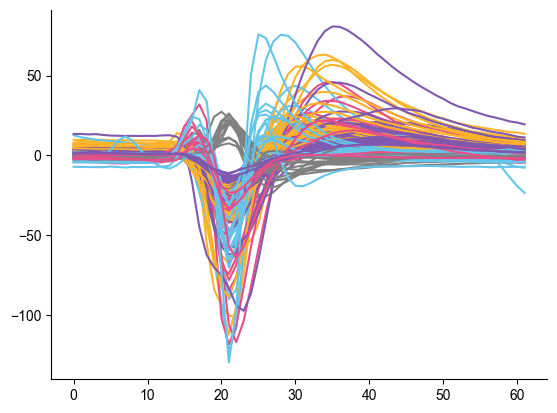

In [289]:
for i,wf in enumerate(mean_unit_waveforms):
    plt.plot(wf, color=CUSTOM_PAL_SORT_4[unit_labs[i]])

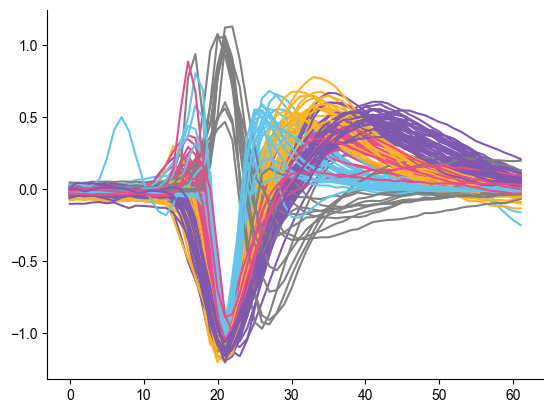

In [291]:
for i,wf in enumerate(waveforms_scaled):
    plt.plot(wf, color=CUSTOM_PAL_SORT_4[unit_labs[i]])

In [239]:
bsns_lab_dict = {
    0: 'Broad-Spiking',
    1: 'Narrow-Spiking Triphasic',
    2: 'Neurite',
    3: 'Neurite',
    4: 'Broad-Spiking Triphasic',
    5: 'Narrow-Spiking'
}

In [293]:
np.sum([3,4,2.342]).round(2)

9.34

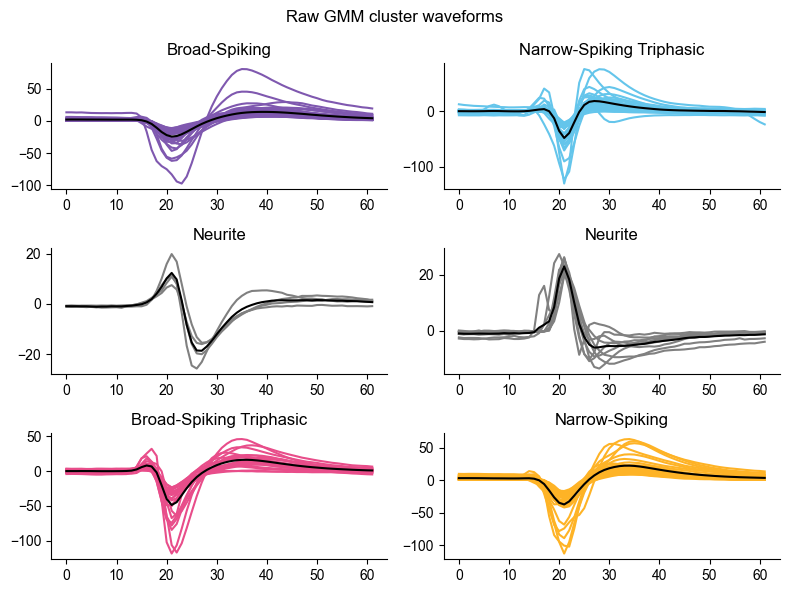

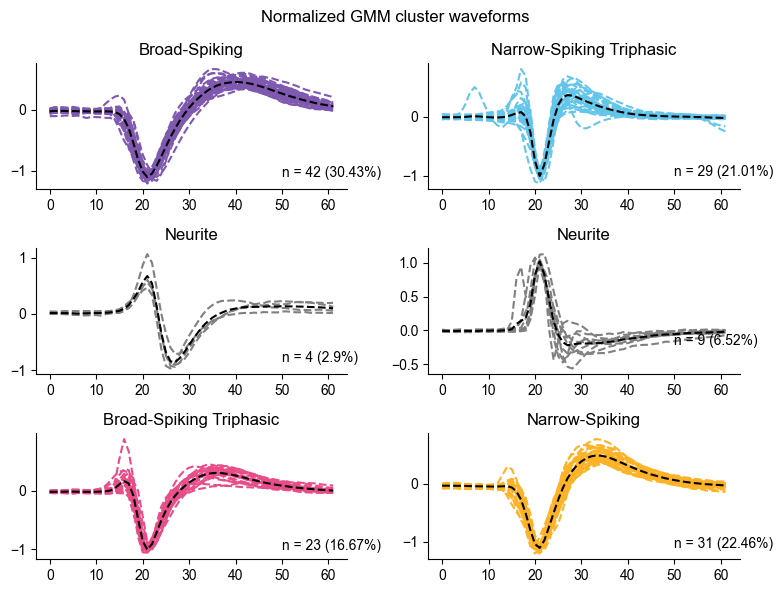

In [298]:
fig, ax = plt.subplots(3,2, figsize=(8,6))

ax = ax.flatten()

for gm_lab in range(6):

    gm_waveforms = mean_unit_waveforms[unit_labs == gm_lab].T
    gm_waveforms_scaled = waveforms_scaled[unit_labs == gm_lab].T

    ax[gm_lab].plot(gm_waveforms, color=CUSTOM_PAL_SORT_4[gm_lab])
    #plt.plot(gm_waveforms_scaled, color=CUSTOM_PAL_SORT_3[gm_lab], linestyle='--')

    ax[gm_lab].plot(gm_waveforms.mean(axis=1), color='k')
    ax[gm_lab].set_title(bsns_lab_dict[gm_lab])
fig.suptitle("Raw GMM cluster waveforms")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(3,2, figsize=(8,6))

ax = ax.flatten()

for gm_lab in range(6):

    gm_waveforms = mean_unit_waveforms[unit_labs == gm_lab].T
    gm_waveforms_scaled = waveforms_scaled[unit_labs == gm_lab].T
    gm_waveform_scaled_mean = gm_waveforms_scaled.mean(axis=1)

    #ax[gm_lab].plot(gm_waveforms, color=CUSTOM_PAL_SORT_3[gm_lab])
    ax[gm_lab].plot(gm_waveforms_scaled, color=CUSTOM_PAL_SORT_4[gm_lab], linestyle='--')
    ax[gm_lab].plot(gm_waveform_scaled_mean , color='k', linestyle='--')
    ax[gm_lab].text(50, np.min(gm_waveform_scaled_mean), f'n = {np.sum(unit_labs == gm_lab)} ({np.round(np.sum(unit_labs == gm_lab) / len(unit_labs) * 100, 2)}%)')
    ax[gm_lab].set_title(f'{bsns_lab_dict[gm_lab]}')
fig.suptitle("Normalized GMM cluster waveforms")
plt.tight_layout()
plt.show()

In [257]:
np.array([42, 29, 4, 9, 23, 31]) / 138

array([0.30434783, 0.21014493, 0.02898551, 0.06521739, 0.16666667,
       0.22463768])

In [285]:
49/70

0.7

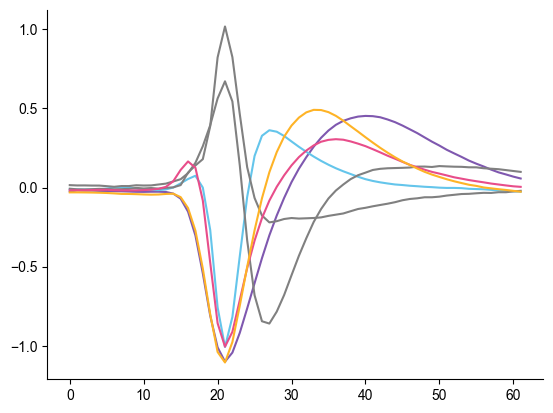

In [299]:
bsns_cluster_mean_wfs = []

for i in range(6):
    bsns_cluster_mean_wf = waveforms_scaled[unit_labs == i].mean(axis=0)
    bsns_cluster_mean_wfs.append(bsns_cluster_mean_wf)
    plt.plot(bsns_cluster_mean_wf, color=CUSTOM_PAL_SORT_4[i])

In [300]:
def extract_mean_kernels(waveform_arr):
    time_kernel_means = []
    frequency_kernel_means = []
    kernel_psd_means = []
    kernel_psd_ATKs = []

    for bn_lab_ix in range(6):
        group_waveforms = waveform_arr[unit_labs == bn_lab_ix]

        time_kernels = []
        frequency_kernels = []
        kernel_psds = []

        for waveform in group_waveforms:
            kernel_t,kernel_f,kernel_psd,freq_axis = fn.filterfuncs.gen_filter(waveform, fs, fs, center=True)
            time_kernels.append(kernel_t)
            frequency_kernels.append(kernel_f)
            kernel_psds.append(kernel_psd)

        time_kernel_mean = np.array(time_kernels).mean(axis=0)
        freq_kernel_mean = np.array(frequency_kernels).mean(axis=0)
        kernel_psd_mean = np.array(kernel_psds).mean(axis=0) 

        # get the PSD of the average time kernel across the group
        _,__,kernel_psd_ATK,___ = fn.filterfuncs.gen_filter(time_kernel_mean, fs, fs, center=True)

        time_kernel_means.append(time_kernel_mean)
        frequency_kernel_means.append(freq_kernel_mean)
        kernel_psd_means.append(kernel_psd_mean)
        kernel_psd_ATKs.append(kernel_psd_ATK)

    time_kernels = np.array(time_kernel_means)
    freq_kernels = np.array(frequency_kernel_means)
    kernel_psds = np.array(kernel_psd_means)
    kernel_psds_ATK = np.array(kernel_psd_ATKs)

    return time_kernels,freq_kernels,kernel_psds,kernel_psds_ATK,freq_axis

In [301]:
time_kernels_raw,freq_kernels_raw,kernel_psds_raw,kernel_psds_ATK_raw,freq_axis = extract_mean_kernels(mean_unit_waveforms)
time_kernels_sc,freq_kernels_sc,kernel_psds_sc,kernel_psds_ATK_sc,freq_axis = extract_mean_kernels(waveforms_scaled)


In [253]:
7+5+5+6+3.5+10+2+7.5

46.0

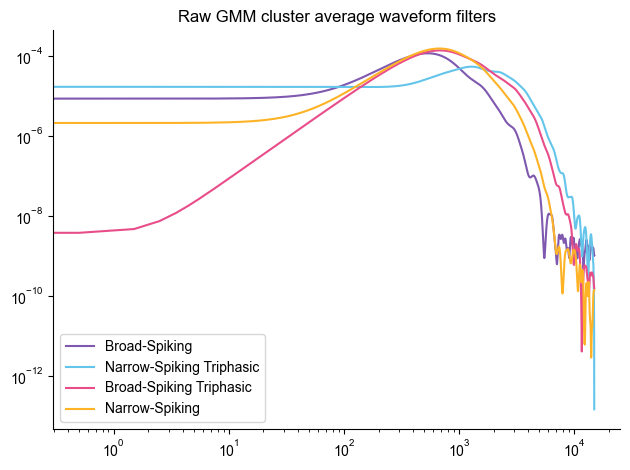

In [302]:
# fig, ax = plt.subplots(3,2, figsize=(8,6))

# ax = ax.flatten()

for gm_lab in [0,1,4,5]:
    #ax[gm_lab].loglog(freq_axis, kernel_psds[gm_lab], color=CUSTOM_PAL_SORT_3[gm_lab])
    # ax[gm_lab].loglog(freq_axis, kernel_psds_ATK[gm_lab], color=CUSTOM_PAL_SORT_3[gm_lab])
    # ax[gm_lab].set_title(bsns_lab_dict[gm_lab])
    plt.loglog(freq_axis, kernel_psds_ATK_raw[gm_lab], color=CUSTOM_PAL_SORT_4[gm_lab], label=bsns_lab_dict[gm_lab])
    #plt.loglog(freq_axis, kernel_psds_sc[gm_lab], color=CUSTOM_PAL_SORT_3[gm_lab], linestyle='--')
plt.title("Raw GMM cluster average waveform filters")
plt.legend()
plt.tight_layout()
plt.show()